In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np 
import pandas as pd


In [2]:
import torch
print(torch.__version__)

2.5.1+cu124


In [3]:
mit_train = pd.read_csv('mitbh_kaggle/mitbih_train.csv',
                          header=None)

print('The shape of train dataset :', mit_train.shape)
mit_train.head()

The shape of train dataset : (87554, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
mit_test = pd.read_csv('mitbh_kaggle/mitbih_test.csv',
                          header=None)

print('The shape of test dataset :', mit_test.shape)
mit_test.head()

The shape of test dataset : (21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print(f'train set classes:{mit_train.iloc[:,-1].unique()}')
print(f'test set classes:{mit_test.iloc[:,-1].unique()}')

train set classes:[0. 1. 2. 3. 4.]
test set classes:[0. 1. 2. 3. 4.]


In [6]:
mit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [7]:
mit_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [8]:
def check_nans(df):
    nan_columns = [column for column, value in df.isna().sum().items() if value != 0]
    
    num_nan_columns = len([column for column, value in df.isna().sum().items() if value != 0])
    print(nan_columns)
    print(num_nan_columns)
    

In [9]:
check_nans(mit_train)
check_nans(mit_test)


[]
0
[]
0


#### labels true names
0: "Normal",

1: "Artial Premature",

2: "Premature ventricular contraction",

3: "Fusion of ventricular and normal",

4: "Fusion of paced and normal"

#### train data

Classes distribtuion for train set
187
Normal                               72471
Fusion of paced and normal            6431
Premature ventricular contraction     5788
Artial Premature                      2223
Fusion of ventricular and normal       641
Name: count, dtype: int64


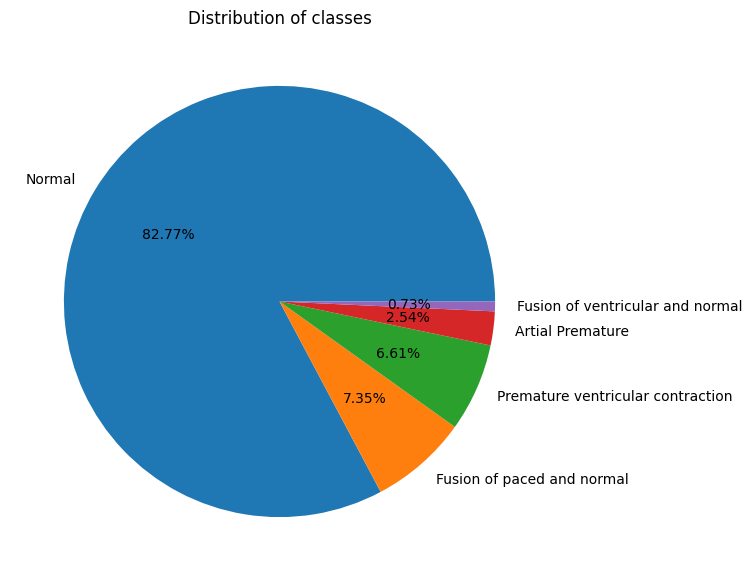

In [10]:
labels = {
        0: "Normal",
        1: "Artial Premature",
        2: "Premature ventricular contraction",
        3: "Fusion of ventricular and normal",
        4: "Fusion of paced and normal"
        }
value_counts = mit_train.iloc[:,-1].value_counts().rename(labels)
print('Classes distribtuion for train set\n=======================================')
print(value_counts)

plt.figure(figsize=(7,7))
plt.pie(x = value_counts.values, labels = value_counts.index, autopct ='%1.2f%%')
plt.title('Distribution of classes');

Classes distribtuion for test set
187
Normal                               18118
Fusion of paced and normal            1608
Premature ventricular contraction     1448
Artial Premature                       556
Fusion of ventricular and normal       162
Name: count, dtype: int64


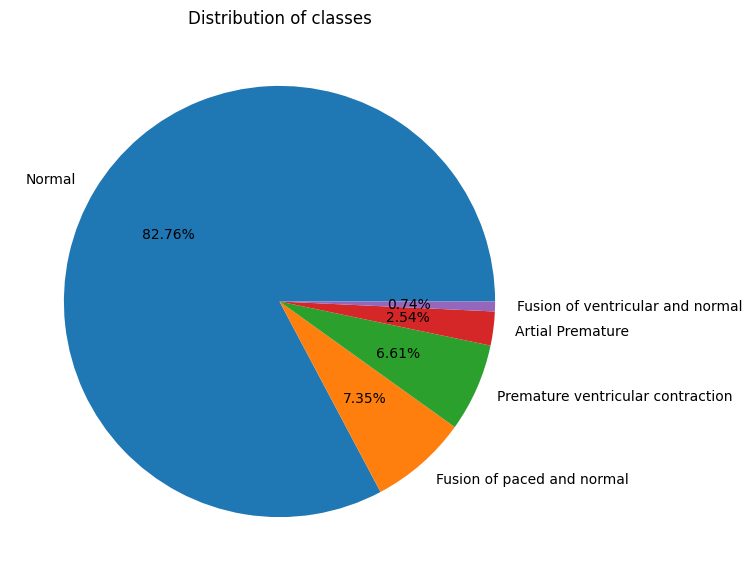

In [11]:
labels = {
        0: "Normal",
        1: "Artial Premature",
        2: "Premature ventricular contraction",
        3: "Fusion of ventricular and normal",
        4: "Fusion of paced and normal"
        }
value_counts = mit_test.iloc[:,-1].value_counts().rename(labels)
print('Classes distribtuion for test set\n=======================================')
print(value_counts)

plt.figure(figsize=(7,7))
plt.pie(x = value_counts.values, labels = value_counts.index, autopct ='%1.2f%%')
plt.title('Distribution of classes');

<Axes: >

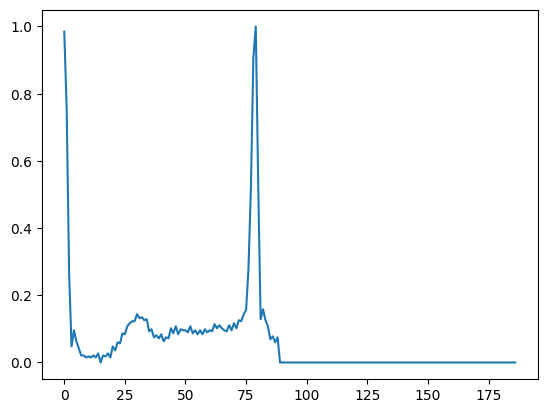

In [12]:
mit_train.iloc[154,:-1].plot()

In [13]:
r = np.random.randint(100)


In [14]:
r

7

In [15]:
ecg_0 = mit_train.loc[mit_train[187]== 0 , :].iloc[r,:187]
ecg_1 = mit_train.loc[mit_train[187]== 1 , :].iloc[r,:187]
ecg_2 = mit_train.loc[mit_train[187]== 2 , :].iloc[r,:187]
ecg_3 = mit_train.loc[mit_train[187]== 3 , :].iloc[r,:187]
ecg_4 = mit_train.loc[mit_train[187]== 4 , :].iloc[r,:187]

ecg_df = pd.DataFrame({'Normal': ecg_0,
                       'Artial Premature': ecg_1,
                       'Premature ventricular contraction': ecg_2,
                       'Fusion of ventricular and normal': ecg_3,
                       'Fusion of paced and normal': ecg_4})

In [16]:
ecg_df

,Normal,Artial Premature,Premature ventricular contraction,Fusion of ventricular and normal,Fusion of paced and normal
0,0.716814,1.000000,0.004808,0.902574,0.943128
1,0.539823,0.772973,0.000000,1.000000,0.859400
2,0.283186,0.070270,0.022837,0.939338,0.823065
3,0.129794,0.000000,0.108173,0.547794,0.734597
4,0.064897,0.148649,0.193510,0.250000,0.666667
...,...,...,...,...,...
182,0.000000,0.000000,0.000000,0.000000,0.000000
183,0.000000,0.000000,0.000000,0.000000,0.000000
184,0.000000,0.000000,0.000000,0.000000,0.000000
185,0.000000,0.000000,0.000000,0.000000,0.000000


Text(0, 0.5, 'Amplitude mV')

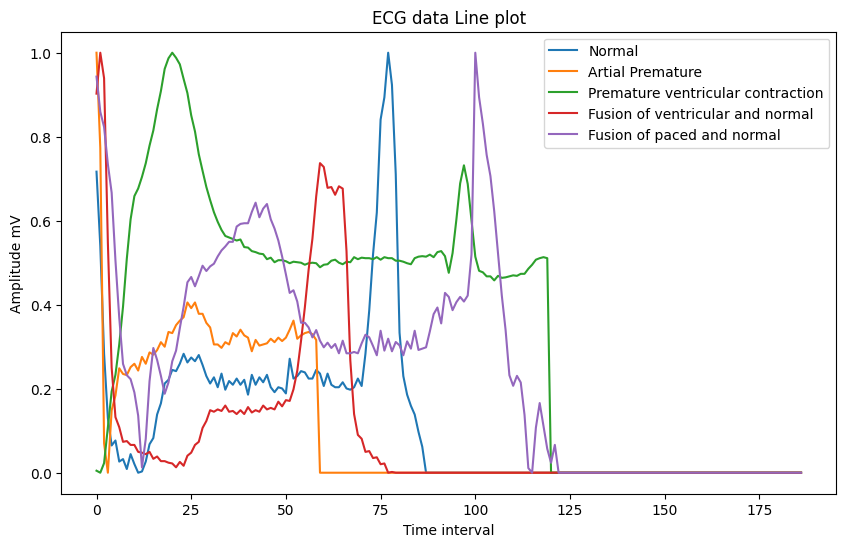

In [17]:
ecg_df.plot( kind = 'line', figsize = (10,6))
plt.title('ECG data Line plot')
plt.xlabel('Time interval')
plt.ylabel('Amplitude mV')

In [18]:
from imblearn.over_sampling import RandomOverSampler

data = mit_train.iloc[:, :-1]
labels = mit_train.iloc[:,-1]

ros = RandomOverSampler(random_state = 42)

data_resampled, labels_resampled = ros.fit_resample(data, labels)

train_df = pd.concat([data_resampled, labels_resampled], axis = 1)
train_df.shape

/root/Documents/TORCH_CV/MIT_heart/myenv/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/root/Documents/TORCH_CV/MIT_heart/myenv/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


(362355, 188)

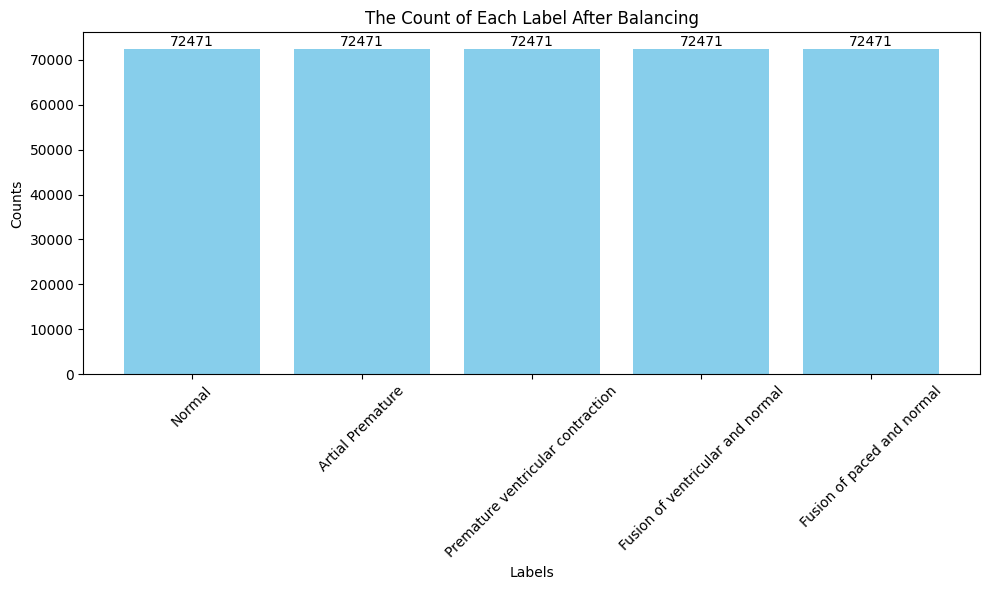

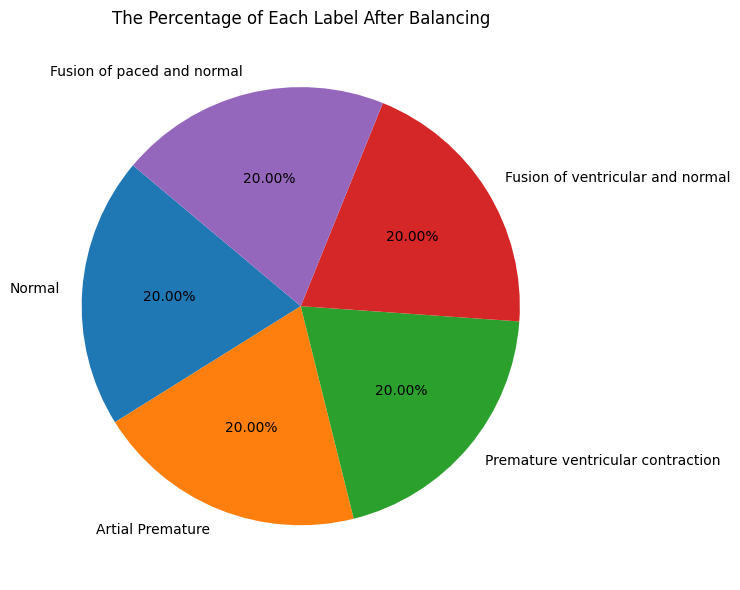

In [19]:


labels = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}

# Calculate value counts and rename index using the labels dictionary
value_counts = train_df.iloc[:, -1].value_counts().rename(index=labels)

# Create the bar plot to see the count of labels
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('The Count of Each Label After Balancing')
plt.xticks(rotation=45)
for i, v in enumerate(value_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Create the pie chart to see the percentage of each label
plt.figure(figsize=(10, 6))
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('The Percentage of Each Label After Balancing')
plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_df.iloc[:, :-1], train_df.iloc[:, -1], test_size=0.2, stratify=train_df.iloc[:, -1], random_state=42)

In [21]:
x_test = mit_test.iloc[:, :187]
y_test = mit_test.iloc[:, 187]

In [22]:
# transform into numpy arrays
x_train = x_train.values
x_val = x_val.values
x_test = x_test.values

y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

In [23]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (289884, 187)
y_train shape:  (289884,)
x_val shape:  (72471, 187)
y_val shape:  (72471,)
x_test shape:  (21892, 187)
y_test shape:  (21892,)


Model

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [25]:
# Add channel dimension: (N, 187) -> (N, 1, 187)
X_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)  # (289884, 1, 187)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_val_tensor = torch.tensor(x_val, dtype=torch.float32).unsqueeze(1)      # (72471, 1, 187)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

X_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)    # (21892, 1, 187)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [26]:
class BaselineModel(nn.Module):
    def __init__(self, num_classes=5):
        super(BaselineModel, self).__init__()
        # Input: (batch, 1, 187)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=5, padding=2)
        self.pool1 = nn.MaxPool1d(kernel_size=2)  # halves length from 187 -> ~93
        
        self.conv2 = nn.Conv1d(32, 64, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool1d(kernel_size=2)  # halves length again -> ~46 or 47
        
        # Determine output length after pooling
        with torch.no_grad():
            dummy = torch.zeros((1, 1, 187))
            out = self.pool1(torch.relu(self.conv1(dummy)))
            out = self.pool2(torch.relu(self.conv2(out)))
            out_len = out.shape[-1]  # final sequence length
        
        self.fc = nn.Linear(64 * out_len, num_classes)
        
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        
        # Flatten (batch, channels * length)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = BaselineModel().to(device)
print(model)


BaselineModel(
  (conv1): Conv1d(1, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=2944, out_features=5, bias=True)
)


In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [31]:
# Simple baseline model
class BaselineModel(nn.Module):
    def __init__(self, num_classes=5):
        super(BaselineModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=5, padding=2)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        
        # Determine shape after conv/pool
        with torch.no_grad():
            dummy = torch.zeros((1, 1, 187))
            out = self.pool1(torch.relu(self.conv1(dummy)))
            out = self.pool2(torch.relu(self.conv2(out)))
            out_len = out.shape[-1]
        
        self.fc = nn.Linear(64 * out_len, num_classes)
        
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = BaselineModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

max_epochs = 5
best_val_loss = float('inf')

for epoch in range(max_epochs):
    # Training
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * X_batch.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)
    
    train_loss = running_loss / total
    train_acc = correct / total
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            val_outputs = model(X_val_batch)
            val_loss = criterion(val_outputs, y_val_batch)
            
            running_val_loss += val_loss.item() * X_val_batch.size(0)
            _, val_preds = torch.max(val_outputs, 1)
            correct_val += (val_preds == y_val_batch).sum().item()
            total_val += y_val_batch.size(0)
    
    val_loss_final = running_val_loss / total_val
    val_acc = correct_val / total_val
    
    print(f"Epoch [{epoch+1}/{max_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss_final:.4f}, Val Acc: {val_acc:.4f}")
    
    # Save the model if the validation loss improves
    if val_loss_final < best_val_loss:
        best_val_loss = val_loss_final
        torch.save(model.state_dict(), "best_model.pth")
        print("Model improved and saved.")

# Loading the best model for inference
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

# Inference example on the test dataset:
y_pred_list = []
y_true_list = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        _, preds = torch.max(outputs, 1)
        y_pred_list.extend(preds.cpu().numpy())
        y_true_list.extend(y_batch.numpy())

# At this point, y_pred_list contains predictions from the saved model.
# You can do further analysis such as calculating metrics or using the predictions for other purposes.
print("Inference done. Predictions available in y_pred_list.")


Epoch [1/5] Train Loss: 0.2983, Train Acc: 0.8931, Val Loss: 0.1729, Val Acc: 0.9390
Model improved and saved.
Epoch [2/5] Train Loss: 0.1423, Train Acc: 0.9509, Val Loss: 0.1090, Val Acc: 0.9643
Model improved and saved.
Epoch [3/5] Train Loss: 0.0999, Train Acc: 0.9668, Val Loss: 0.0844, Val Acc: 0.9745
Model improved and saved.
Epoch [4/5] Train Loss: 0.0752, Train Acc: 0.9760, Val Loss: 0.0650, Val Acc: 0.9802
Model improved and saved.
Epoch [5/5] Train Loss: 0.0608, Train Acc: 0.9810, Val Loss: 0.0569, Val Acc: 0.9828
Model improved and saved.


/tmp/ipykernel_7477/3782815793.py:90: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Inference done. Predictions available in y_pred_list.


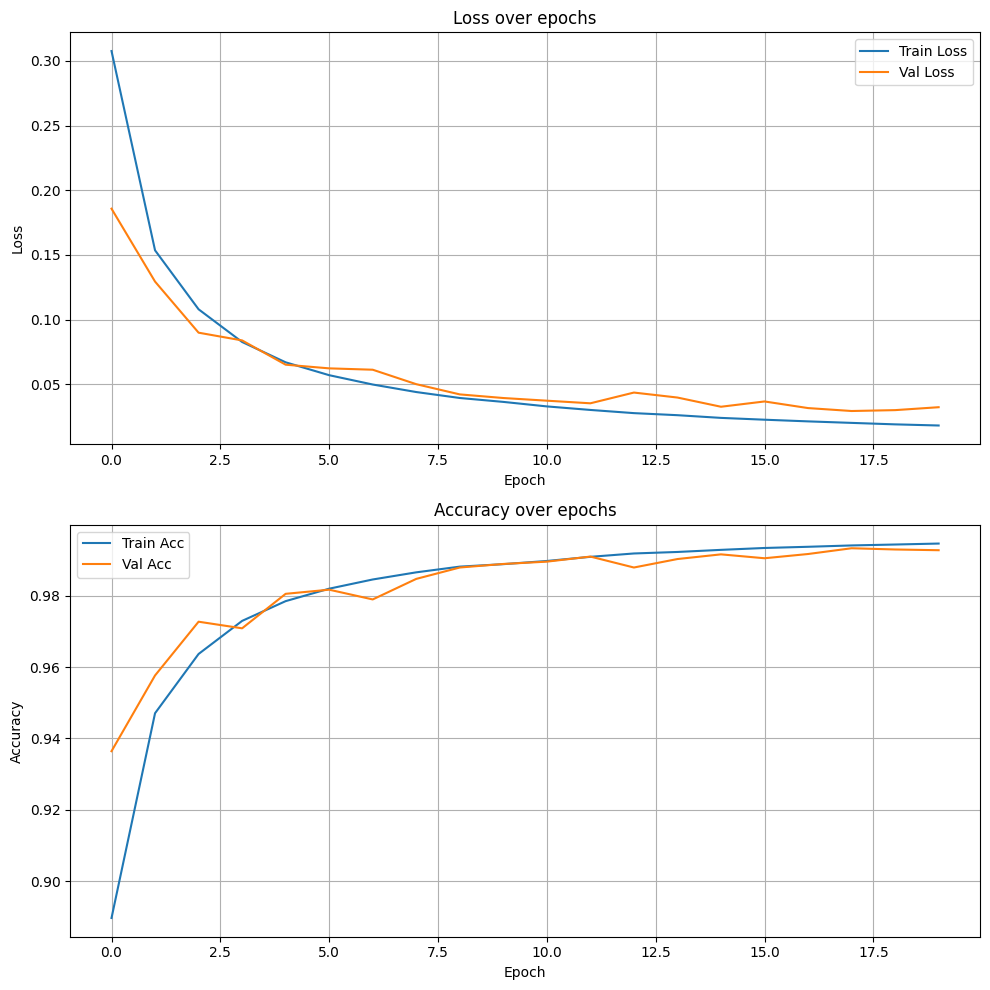

In [ ]:
# fig, axs = plt.subplots(2, 1, figsize=(10,10))

# # Loss
# axs[0].plot(train_losses, label='Train Loss')
# axs[0].plot(val_losses, label='Val Loss')
# axs[0].set_title('Loss over epochs')
# axs[0].set_xlabel('Epoch')
# axs[0].set_ylabel('Loss')
# axs[0].legend()
# axs[0].grid(True)

# # Accuracy
# axs[1].plot(train_accuracies, label='Train Acc')
# axs[1].plot(val_accuracies, label='Val Acc')
# axs[1].set_title('Accuracy over epochs')
# axs[1].set_xlabel('Epoch')
# axs[1].set_ylabel('Accuracy')
# axs[1].legend()
# axs[1].grid(True)

# plt.tight_layout()
# plt.show()


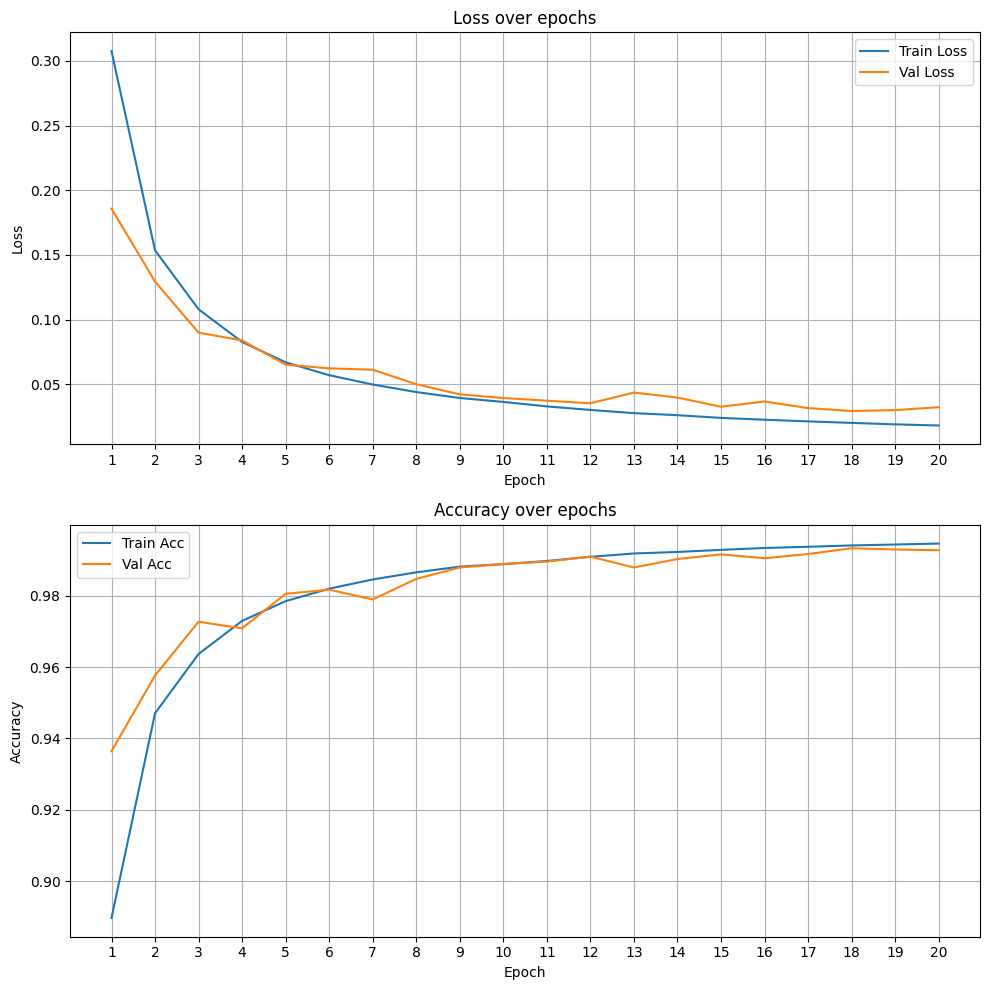

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))

# Loss
axs[0].plot(train_losses, label='Train Loss')
axs[0].plot(val_losses, label='Val Loss')
axs[0].set_title('Loss over epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xticks(range(len(train_losses)))
axs[0].set_xticklabels(range(1, len(train_losses) + 1))

# Accuracy
axs[1].plot(train_accuracies, label='Train Acc')
axs[1].plot(val_accuracies, label='Val Acc')
axs[1].set_title('Accuracy over epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xticks(range(len(train_accuracies)))
axs[1].set_xticklabels(range(1, len(train_accuracies) + 1))

plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     18118
           1       0.39      0.85      0.53       556
           2       0.90      0.95      0.92      1448
           3       0.50      0.88      0.64       162
           4       0.95      0.99      0.97      1608

    accuracy                           0.94     21892
   macro avg       0.75      0.92      0.81     21892
weighted avg       0.96      0.94      0.95     21892



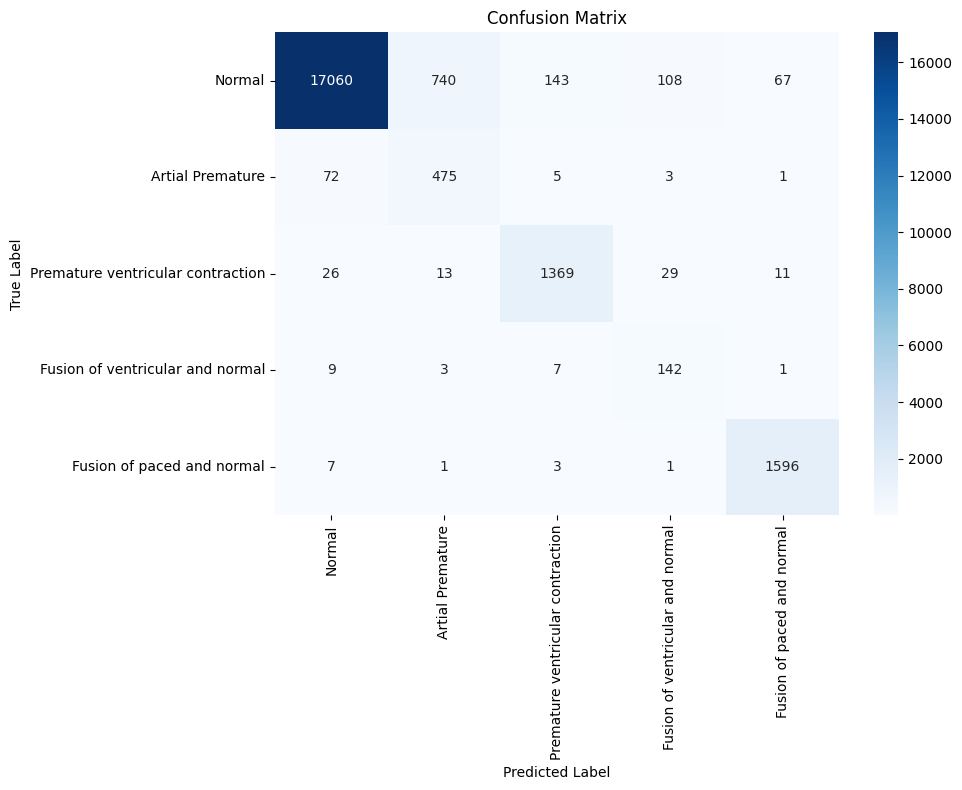

In [37]:
# ... (All your previous code remains unchanged)

# After training and loading the best model, we did inference on the test set:
# y_pred_list and y_true_list contain the predictions and true labels respectively.

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert lists to NumPy arrays if needed (not strictly necessary for classification_report)
y_pred_array = np.array(y_pred_list)
y_true_array = np.array(y_true_list)

# Print classification report
print(classification_report(y_true_array, y_pred_array))

# Generate confusion matrix
cm = confusion_matrix(y_true_array, y_pred_array)
labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion of ventricular and normal', 'Fusion of paced and normal']

cm_fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

           0       0.99      0.94      0.97     18118
           1       0.39      0.85      0.53       556
           2       0.90      0.95      0.92      1448
           3       0.50      0.88      0.64       162
           4       0.95      0.99      0.97      1608

    accuracy                           0.94     21892
   macro avg       0.75      0.92      0.81     21892
weighted avg       0.96      0.94      0.95     21892



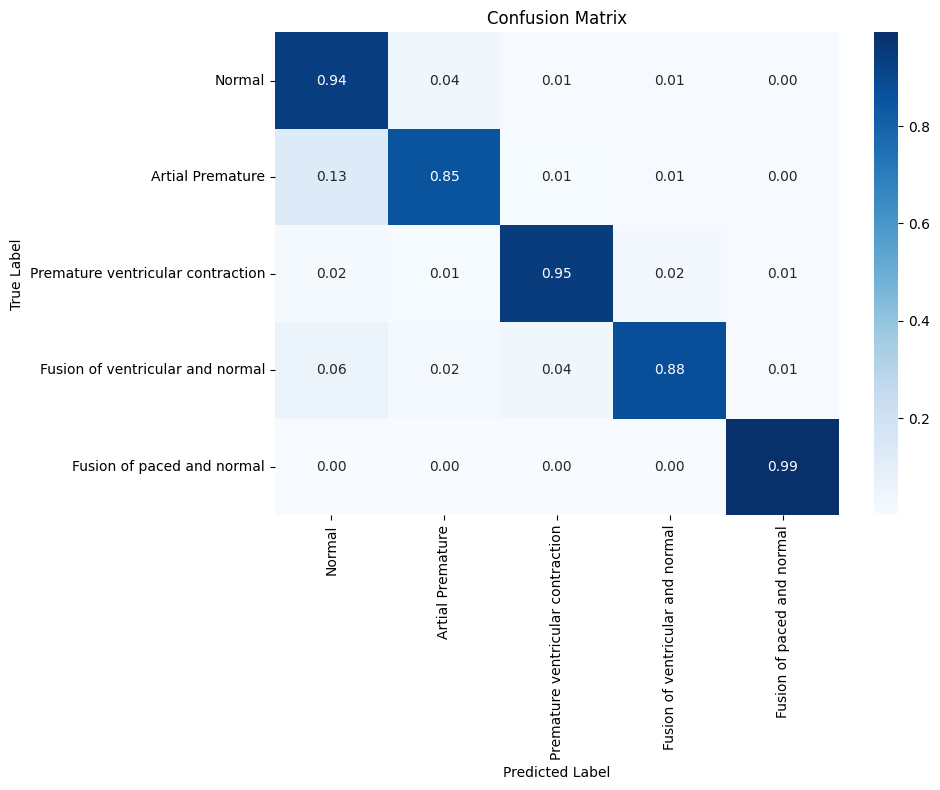

In [ ]:
# Convert lists to NumPy arrays if needed (not strictly necessary for classification_report)
y_pred_array = np.array(y_pred_list)
y_true_array = np.array(y_true_list)

# Print classification report
print(classification_report(y_true_array, y_pred_array))

# Generate confusion matrix
cm = confusion_matrix(y_true_array, y_pred_array, normalize='true')
labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion of ventricular and normal', 'Fusion of paced and normal']

cm_fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.tight_layout()
plt.show()